<a href="https://colab.research.google.com/github/Tanvir1080/ArtificalIntelligence-2019/blob/master/CustomFeaturesForDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Dataset and Preprocess

In [14]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

(trainImagesOriginal, trainLabelsOriginal), (testImagesOriginal, testLabelsOriginal) = mnist.load_data()

trainImages = trainImagesOriginal.reshape((60000, 28 * 28))
trainImages = trainImages.astype('float32') / 255

testImages = testImagesOriginal.reshape((10000, 28 * 28))
testImages = testImages.astype('float32') / 255

(60000, 784)

In [0]:
trainLabels = to_categorical(trainLabelsOriginal)
testLabels = to_categorical(testLabelsOriginal)

In [0]:
def calcHeight(image):
  # Max row val
  firstRow = 28; 

  # Minimum row val
  lastRow = 0;   

  for row in range(image.shape[0]):
    for col in range(image.shape[1]):
      if image[row][col] !=0:
        if row < firstRow:
          firstRow = row
        if row > lastRow:
          lastRow = row

  # normalize data before return 
  return (lastRow-firstRow)/28 

def calcWidth(image):
  # Max row val 
  firstCol = 28;

  # Minimum row val  
  lastCol = 0;   

  for row in range(image.shape[0]):
    for col in range(image.shape[1]):
      if image[row][col] !=0:
        if col < firstCol:
          firstCol = row
        if col > lastCol:
          lastCol = row

  # normalize data before return 
  return (lastCol-firstCol)/28 

width = np.array([calcWidth(item) for item in trainImagesOriginal])
height = np.array([calcHeight(item) for item in trainImagesOriginal])

testWidth = np.array([calcWidth(item) for item in testImagesOriginal])
testHeight = np.array([calcHeight(item) for item in testImagesOriginal])

In [0]:
finalTrain = np.column_stack((trainImages, height, width))
finalTest = np.column_stack((testImages, testHeight, testWidth))

In [24]:
model = keras.Sequential([
    keras.layers.Dense(1024, activation=tf.nn.relu, input_shape=((28 * 28)+2,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 10
history = model.fit(finalTrain, 
                      trainLabels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(finalTest, testLabels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.2434 - acc: 0.9273 - val_loss: 0.1106 - val_acc: 0.9644
Epoch 2/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0997 - acc: 0.9697 - val_loss: 0.0825 - val_acc: 0.9733
Epoch 3/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0685 - acc: 0.9794 - val_loss: 0.0664 - val_acc: 0.9794
Epoch 4/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0523 - acc: 0.9845 - val_loss: 0.0722 - val_acc: 0.9786
Epoch 5/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0401 - acc: 0.9875 - val_loss: 0.0709 - val_acc: 0.9794
Epoch 6/10
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0340 - acc: 0.9891 - val_loss: 0.0684 - val_acc: 0.9793
Epoch 7/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0274 - acc: 0.9914 - val_loss: 0.

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

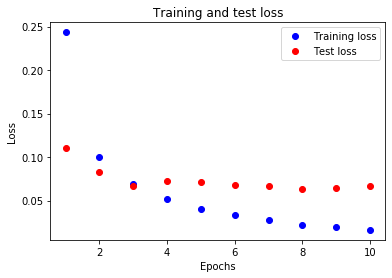

In [32]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

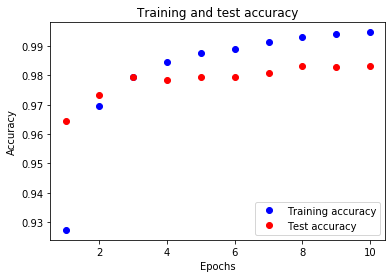

In [34]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()